# Roller Coaster

(Project and data from codecademy.com)

In this project, I code various function to visualize data about roller coasters as line graphs, bar plots, histograms, pie charts and scatter plots. 

At first, I import all necessary libraries and chose a design for the plots to visualize the data.

In [2]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
sns.set_style("white")
sns.set_palette('Set1')
plt.rcParams.update({'font.size': 12})

I import the two dataframes and have a first look at them.

In [4]:
df_wood = pd.read_csv('Golden_Ticket_Award_Winners_Wood.csv')
df_steel = pd.read_csv('Golden_Ticket_Award_Winners_Steel.csv')

In [5]:
df_steel.head(10)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Millennium Force,Cedar Point,"Sandusky, Ohio",Intamin,2000,1204,2013
1,2,Bizarro,Six Flags New England,"Agawam, Mass.",Intamin,2000,1011,2013
2,3,Expedition GeForce,Holiday Park,"Hassloch, Germany",Intamin,2001,598,2013
3,4,Nitro,Six Flags Great Adventure,"Jackson, N.J.",B&M,2001,596,2013
4,5,Apollo’s Chariot,Busch Gardens Williamsburg,"Williamsburg, Va.",B&M,1999,542,2013
5,6,New Texas Giant,Six Flags Over Texas,"Arlington, Texas",Rocky Mountain,2011,512,2013
6,7,Goliath,Six Flags Over Georgia,"Austell, Ga.",B&M,2006,494,2013
7,8,Intimidator,Carowinds,"Charlotte, N.C.",B&M,2010,478,2013
8,9,Magnum XL-200,Cedar Point,"Sandusky, Ohio",Arrow,1989,416,2013
9,10,Intimidator-305,Kings Dominion,"Doswell, Va.",Intamin,2010,412,2013


In [6]:
df_wood.head(10)

,Rank,Name,Park,Location,Supplier,Year Built,Points,Year of Rank
0,1,Boulder Dash,Lake Compounce,"Bristol, Conn.",CCI,2000,1333,2013
1,2,El Toro,Six Flags Great Adventure,"Jackson, N.J.",Intamin,2006,1302,2013
2,3,Phoenix,Knoebels Amusement Resort,"Elysburg, Pa.",Dinn/PTC-Schmeck,1985,1088,2013
3,4,The Voyage,Holiday World,"Santa Claus, Ind.",Gravity Group,2006,1086,2013
4,5,Thunderhead,Dollywood,"Pigeon Forge, Tenn.",GCII,2004,923,2013
5,6,Ravine Flyer II,Waldameer,"Erie, Pa.",Gravity Group,2008,712,2013
6,7,Outlaw Run,Silver Dollar City,"Branson, Mo.",Rocky Mountain,2013,599,2013
7,8,The Beast,Kings Island,"Kings Mills, Ohio",KECO,1979,555,2013
8,9,Lightning Racer,Hersheypark,"Hershey, Pa.",GCII,2000,364,2013
9,10,Shivering Timbers,Michigan’s Adventure,"Muskegon, Mich.",CCI,1998,304,2013


The following function takes the name of a roller coaster, the name of the corresponding park and the name of the dataframe and plots the ranking of the given roller coaster over time.

In [40]:
def plot_roller_coaster(roller_coaster, park_name, dataframe):
    df_select = dataframe[(dataframe.Park == park_name) 
                          & (dataframe.Name == roller_coaster)].reset_index()
    df_coaster_rank = df_select['Rank']
    df_select['negative_rank'] = df_select.Rank.apply(lambda x: x * -1)
    
    plt.plot(df_select['Year of Rank'], df_select['negative_rank'])
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Rank of {} each Year'.format(roller_coaster))
    
    ax = plt.subplot()
    max_rank = df_select.Rank.max()
    min_rank = df_select.Rank.min()
    ax.set_yticks(range(-max_rank, -min_rank +1))
    ax.set_yticklabels(range(max_rank, min_rank -1, -1))
    
    plt.show()

/Users/Helene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  if sys.path[0] == '':


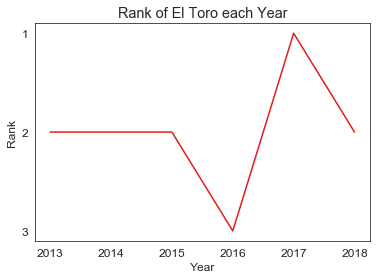

In [41]:
plot_roller_coaster('El Toro', 'Six Flags Great Adventure', df_wood)

This function plots the ranking of two roller coasters over time as a line and takes the names of the roller coasters, the names of the respective parks and the dataframe. 

In [25]:
def plot_two_roller_coasters(roller_coaster_1, park_name_1, roller_coaster_2, park_name_2, dataframe):
    
    df_coaster_1 = dataframe[(dataframe.Name == roller_coaster_1) 
                             & (dataframe.Park == park_name_1)].reset_index()
    #print(df_coaster_1)
    
    df_coaster_2 = dataframe[(dataframe.Name == roller_coaster_2) & 
                            (dataframe.Park == park_name_2)].reset_index()
    #print(df_coaster_2)
    
    df_coaster_1['negative_rank'] = df_coaster_1.Rank.apply(lambda x: x * -1)
    df_coaster_year_1 = df_coaster_1['Year of Rank']
    #print(df_coaster_year_1)
    
    df_coaster_2['negative_rank'] = df_coaster_2.Rank.apply(lambda x: x * -1)
    df_coaster_year_2 = df_coaster_2['Year of Rank']
    #print(df_coaster_year_2)
    
    plt.plot(df_coaster_year_1, df_coaster_1.negative_rank)
    plt.plot(df_coaster_year_2, df_coaster_2.negative_rank)
    plt.xlabel('Year')
    plt.ylabel('Rank')
    plt.title('Rank of {} and {} each Year'.format(roller_coaster_1, roller_coaster_2))
    plt.legend([roller_coaster_1, roller_coaster_2])
    
    ax = plt.subplot()
    
    max_rank_1 = df_coaster_1.Rank.max()
    max_rank_2 = df_coaster_2.Rank.max()
    if max_rank_1 > max_rank_2:
        max_rank = max_rank_1.max()
    else:
        max_rank = max_rank_2.max()
    #print(max_rank)
        
    min_rank_1 = df_coaster_1.Rank.min()
    min_rank_2 = df_coaster_2.Rank.min()
    if min_rank_1 < min_rank_2:
        min_rank = min_rank_1.min()
    else:
        min_rank = min_rank_2.min()
    #print(min_rank)
        
    ax.set_yticks(range(-max_rank, -min_rank +1))
    ax.set_yticklabels(range(max_rank, min_rank -1, -1))
    
    plt.show()

/Users/Helene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:26: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


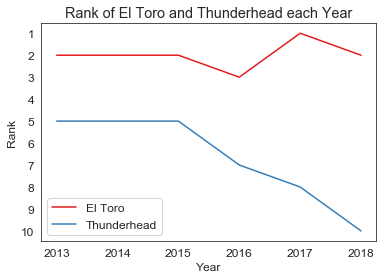

<Figure size 432x288 with 0 Axes>

In [27]:
plot_two_roller_coasters('El Toro', 'Six Flags Great Adventure', 'Thunderhead', 'Dollywood', df_wood)
plt.savefig('plot_two_rollercoasters.png')

This function plots the ranking of the top n ranked roller coasters over time as lines.

In [28]:
from matplotlib import pylab

def plot_n_roller_coasters(dataframe, n):
    
    plt.figure(figsize = (8, 6))
    ax = plt.subplot()
    
    top_n_rankings = dataframe[dataframe['Rank'] <= n]
    
    for coaster in set(top_n_rankings['Name']):
        coaster_rankings = top_n_rankings[top_n_rankings['Name'] == coaster]
        ax.plot(coaster_rankings['Year of Rank'], coaster_rankings['Rank'].apply(lambda x: x * -1), label = coaster)
    
    plt.title('Rank over Time of the Top {} Ranked Roller Coasters'.format(n))
    pylab.legend(loc=9, bbox_to_anchor = (1.2, 1))
    
    max_rank = coaster_rankings['Rank'].max()
    #print(max_rank)
        
    min_rank = top_n_rankings['Rank'].min()
    #print(min_rank)
        
    ax.set_yticks(range(-max_rank, -min_rank +1))
    ax.set_yticklabels(range(max_rank, min_rank -1, -1))
    plt.show()

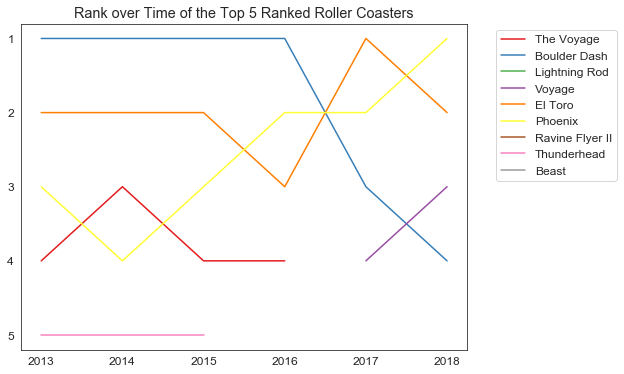

<Figure size 432x288 with 0 Axes>

In [30]:
plot_n_roller_coasters(df_wood, 5)
plt.savefig('plot_top_5_rollercoasters.png')

The following functions visualize statistics about the roller coasters themselves. 

In [20]:
df_roller_coasters = pd.read_csv('roller_coasters.csv')
df_roller_coasters.head()

,name,material_type,seating_type,speed,height,length,num_inversions,manufacturer,park,status
0,Goudurix,Steel,Sit Down,75.0,37.0,950.0,7.0,Vekoma,Parc Asterix,status.operating
1,Dream catcher,Steel,Suspended,45.0,25.0,600.0,0.0,Vekoma,Bobbejaanland,status.operating
2,Alucinakis,Steel,Sit Down,30.0,8.0,250.0,0.0,Zamperla,Terra Mítica,status.operating
3,Anaconda,Wooden,Sit Down,85.0,35.0,1200.0,0.0,William J. Cobb,Walygator Parc,status.operating
4,Azteka,Steel,Sit Down,55.0,17.0,500.0,0.0,Soquet,Le Pal,status.operating


This function takes the name of a dataframe and the name of a numeric column and plots a histogram with it.

In [31]:
def roller_coaster_plot(dataframe, column_as_string):
    var_max = dataframe[column_as_string].max()
    #print(var_max)
    var_min = dataframe[column_as_string].min()
    #print(var_min)
    plt.hist(dataframe[column_as_string], bins = 20, range = (var_min, var_max + 1))
    label = column_as_string.title()
    
    if column_as_string == 'num_inversions':
        plt.title('{} of All Roller Coasters'.format('Number of Inversions'))
    else:
        plt.title('{} of All Roller Coasters'.format(label))
    
    plt.ylabel('Number of Roller Coasters')
    
    if column_as_string == 'num_inversions':
        plt.xlabel('Number of Inversions')
    else:
        plt.xlabel(label)
    plt.show()

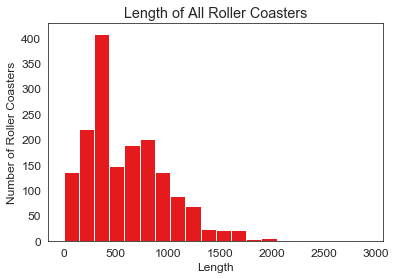

<Figure size 432x288 with 0 Axes>

In [32]:
roller_coaster_plot(df_roller_coasters, 'length')
plt.savefig('rollercoaster_length.png')

This function plots a bar chart showing the number of inversions for each roller coaster at an amusement park and takes the roller coaster dataframe and an amusement park name as arguments. 

In [33]:
def inversions_roller_coaster(dataframe, park_name_as_string):
    roller_coasters = dataframe[dataframe.park == park_name_as_string].reset_index()
    #print(roller_coasters)
    number_inversions = roller_coasters.num_inversions
    #print(number_inversions)
    
    y_values = number_inversions
    x_values = range(len(y_values))
    plt.bar(x_values, y_values)
    plt.title('Number of Inversions per Roller Coaster at {}'.format(park_name_as_string))
    plt.ylabel('Number of Inversions')
    plt.xlabel('Name of Roller Coasters')
    
    ax = plt.subplot()
    names = roller_coasters.name
    ax.set_xticks(range(len(names)))
    ax.set_xticklabels(names, rotation = 90)
    plt.show()

/Users/Helene/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:14: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  


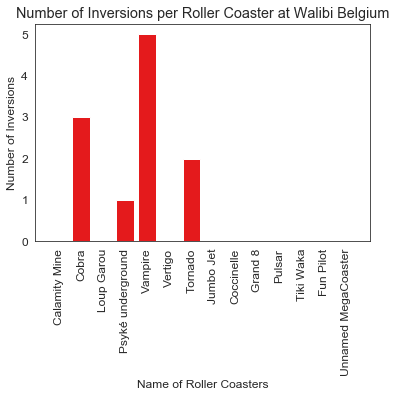

In [34]:
inversions_roller_coaster(df_roller_coasters, 'Walibi Belgium')

This function plots a pie chart that compares the number of operating roller coasters ('status.operating') to the number of closed roller coasters ('status.closed.definitely') and takes the roller coaster dataframe as an argument.

In [35]:
def operating_roller_coasters(dataframe):
    operating = dataframe[dataframe.status == 'status.operating'].status.count()
    not_operating = dataframe[dataframe.status == 'status.closed.definitely'].status.count()
    my_list = [operating, not_operating]
    plt.pie(my_list, labels = ['Operating', 'Closed definitely'], autopct = '%0.1f%%')
    plt.axis('equal')
    plt.title('Operating Status of Roller Coasters')
    plt.show()

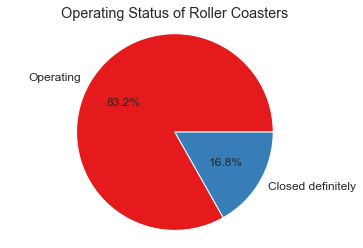

<Figure size 432x288 with 0 Axes>

In [37]:
operating_roller_coasters(df_roller_coasters)
plt.savefig('operating_status.png')

This function creates a scatter plot of two numeric columns of the roller coaster DataFrame.

In [39]:
def scatter_plot(dataframe, column1_as_string, column2_as_string):
    
    x_values = dataframe[column1_as_string]
    y_values = dataframe[column2_as_string]
    #print(x_values.head())
    #print(y_values.head())
    
    x_label = column1_as_string.title()
    y_label = column2_as_string.title()
    
    plt.scatter(x_values, y_values, s = 10, color = 'b', marker = 'o')
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    if column1_as_string == 'num_inversions':
        plt.xlabel('Number of Inversions')
    elif column2_as_string == 'num_inversions':
        plt.ylabel('Number of Inversions')
    else:
        plt.xlabel(x_label)
        plt.ylabel(y_label)
    
    if column1_as_string == 'num_inversions':
        plt.title('Correlation Between {} \n and {} of Roller Coasters'.format('Number of Inversions', y_label))
    elif column2_as_string == 'num_inversions':
        plt.title('Correlation Between {} \n and {} of Roller Coasters'.format(x_label, 'Number of Inversions'))
    else:
        plt.title('Correlation Between {} \n and {} of Roller Coasters'.format(x_label, y_label))
    
    plt.show()

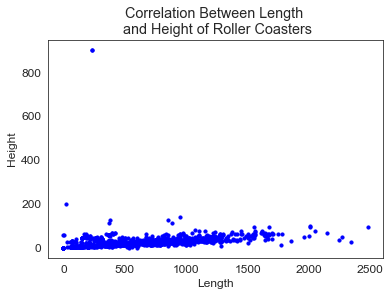

<Figure size 432x288 with 0 Axes>

In [38]:
scatter_plot(df_roller_coasters, 'length', 'height')
plt.savefig('correlation_length_height.png')